# Project Akhir Algoritma Pemograman
---
DIV Akuntansi Sektor Publik alih Program Kelas 9 Sistem Informasi
---
Nama : Elzami Haqie Ednoer
    
NIM/No. Absen  : 4132210005/02

---

Nama : Intan Permatasari
    
NIM/No. Absen  : 4132210008/06

---

Nama : Ramiz Firas
    
NIM/No. Absen  : 4132210052/09



## Latar Belakang

- target PDB
- kecenderungan tren naik dengan adanya anomali spt misal 2020 apakah tercermin
- apakah target tercermin melalui model prediksi yang tetap menangkap anomali

## Import Library yang dibutuhkan selama project berlangsung

In [1]:
import pandas as pd
import numpy as np
import missingno

#import package for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
import pmdarima as pm

## Import Dataset yang akan digunakan untuk project

In [2]:
GDP = pd.read_csv("gdp 1960-2022.csv")
Population = pd.read_csv("population 1960-2021.csv")

In [3]:
GDP

,Jenis Pengeluaran,[Seri 1960] 1. PDB Atas Dasar Harga Berlaku Menurut Pengeluaran (Milyar Rupiah),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,NaN,1972,1971,1970.0,1969.0,1968.0,1967.0,1966.0,1965,1964.0,...,2019.0,2018,2017.0,2016.0,2015.0,2014.0,2013,2012.0,2011,2010.0
1,PRODUK DOMESTIK BRUTO,4548,3794,3340.2,2718.3,2096.7,847.8,315.9,23710,7133.5,...,15832657.2,14838756,13589825.7,12401728.5,11526332.8,10569705.3,9546134,8615704.5,7831726,6864133.1


In [4]:
Population

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Indonesia,IDN,"Population, total",SP.POP.TOTL,88382881,90816938,93345489,95962527,98675061,101157868,...,250222695,253275918,256229761,259091970,261850182,264498852,267066843,269582878,271857970,273753191


## Preprocessing Data

#### Transpose Data

In [5]:
#Data yang telah di import kemudian di Tranpose untuk memenuhi kebutuhan terhadap bentuk data selama project
GDP = GDP.transpose()
Population = Population.transpose()

In [6]:
GDP

,0,1
Jenis Pengeluaran,NaN,PRODUK DOMESTIK BRUTO
[Seri 1960] 1. PDB Atas Dasar Harga Berlaku Menurut Pengeluaran (Milyar Rupiah),1972,4548
Unnamed: 2,1971,3794
Unnamed: 3,1970.0,3340.2
Unnamed: 4,1969.0,2718.3
...,...,...
Unnamed: 59,2014.0,10569705.3
Unnamed: 60,2013,9546134
Unnamed: 61,2012.0,8615704.5
Unnamed: 62,2011,7831726


In [7]:
Population

,0
Country Name,Indonesia
Country Code,IDN
Indicator Name,"Population, total"
Indicator Code,SP.POP.TOTL
1960,88382881
...,...
2017,264498852
2018,267066843
2019,269582878
2020,271857970


### Mengolah Kolom dan Index

In [8]:
#Setelah Data di Transpose kemudian mengatus nama kolom dan letak kolom
GDP.columns = ['Tahun', 'GDP']
GDP = GDP[1:]
GDP

,Tahun,GDP
[Seri 1960] 1. PDB Atas Dasar Harga Berlaku Menurut Pengeluaran (Milyar Rupiah),1972,4548
Unnamed: 2,1971,3794
Unnamed: 3,1970.0,3340.2
Unnamed: 4,1969.0,2718.3
Unnamed: 5,1968.0,2096.7
...,...,...
Unnamed: 59,2014.0,10569705.3
Unnamed: 60,2013,9546134
Unnamed: 61,2012.0,8615704.5
Unnamed: 62,2011,7831726


In [9]:
Population = Population[4:]
Population

,0
1960,88382881
1961,90816938
1962,93345489
1963,95962527
1964,98675061
...,...
2017,264498852
2018,267066843
2019,269582878
2020,271857970


In [10]:
#Mereset Indeks pada Dataframe yang telah di import

GDP = GDP.reset_index()
Population = Population.reset_index()
GDP

,index,Tahun,GDP
0,[Seri 1960] 1. PDB Atas Dasar Harga Berlaku Me...,1972,4548
1,Unnamed: 2,1971,3794
2,Unnamed: 3,1970.0,3340.2
3,Unnamed: 4,1969.0,2718.3
4,Unnamed: 5,1968.0,2096.7
...,...,...,...
58,Unnamed: 59,2014.0,10569705.3
59,Unnamed: 60,2013,9546134
60,Unnamed: 61,2012.0,8615704.5
61,Unnamed: 62,2011,7831726


In [11]:
Population

,index,0
0,1960,88382881
1,1961,90816938
2,1962,93345489
3,1963,95962527
4,1964,98675061
...,...,...
57,2017,264498852
58,2018,267066843
59,2019,269582878
60,2020,271857970


In [12]:
#Mengganti nama kolom pada DataFrame yang tersedia

Population.columns = ['Tahun', 'Population']
GDP = GDP[['Tahun','GDP']]

In [13]:
GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tahun   63 non-null     object
 1   GDP     63 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [14]:
Population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tahun       62 non-null     object
 1   Population  62 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [15]:
#Mengubah type data kolom

GDP = GDP.applymap(str)
Population = Population.applymap(str)

In [16]:
GDP['Tahun'] = GDP['Tahun'].str[:4]
GDP

,Tahun,GDP
0,1972,4548
1,1971,3794
2,1970,3340.2
3,1969,2718.3
4,1968,2096.7
...,...,...
58,2014,10569705.3
59,2013,9546134
60,2012,8615704.5
61,2011,7831726


In [17]:
#Terhadap nilai - pada data diubah menjadi 0

GDP = GDP.apply(lambda x : x.str.replace("-","0", regex=True))

In [18]:
# Mengubah type data menjadi float, karena ketika dilakukan input perintah, type data str tidak dapat diubah langsung menjadi int.

GDP = GDP.applymap(float)
Population = Population.applymap(float)

In [19]:
#Mengubah type data menjadi Int sesuai dengan kebutuhan bentuk data dalam project

GDP['Tahun'] = GDP['Tahun'].apply(int)
Population['Tahun'] = Population['Tahun'].apply(int)

In [20]:
Population

,Tahun,Population
0,1960,88382881.0
1,1961,90816938.0
2,1962,93345489.0
3,1963,95962527.0
4,1964,98675061.0
...,...,...
57,2017,264498852.0
58,2018,267066843.0
59,2019,269582878.0
60,2020,271857970.0


### Sorting Value

In [21]:
# Data yang tersedia belum dalam bentuk yang urut. sehingga perintah sort value harus dilakukan

GDP = GDP.sort_values('Tahun', ascending = True)
GDP

,Tahun,GDP
12,1960,390.2
11,1961,470.1
10,1962,1335.1
9,1963,3208.8
8,1964,7133.5
...,...,...
54,2018,14838756.0
53,2019,15832657.2
52,2020,15438017.5
51,2021,16970789.2


In [22]:
# Menghapus baris terakhir karena tidak diperlukan dan supaya dimensi data dari kedua dataframe sama

GDP = GDP.iloc[:-1]

### Merger DataFrame

In [23]:
#Melakukan Merger pada Dataframe GDP dengan Dataframe Population menjadi Dataframe baru dengan nama Data_Master

Data_Master = GDP.merge(Population, left_on='Tahun', right_on='Tahun')

### Pengecekan Dataframe baru yang telah diolah

In [24]:
#Menambah Kolom baru yaitu Growth Percentage pada DataFrame Data_Master

Data_Master["Growth_Percentage"]=Data_Master["GDP"].pct_change()

In [25]:
#Melihat Deskripsi data pada Dataframe Data_Master

Data_Master.describe()

,Tahun,GDP,Population,Growth_Percentage
count,62.000000,6.200000e+01,6.200000e+01,61.000000
mean,1990.500000,2.903404e+06,1.821599e+08,0.315510
std,18.041619,4.863077e+06,5.706037e+07,0.497025
min,1960.000000,3.159000e+02,8.838288e+07,-0.986677
25%,1975.250000,1.635270e+04,1.320402e+08,0.107992
50%,1990.500000,2.115237e+05,1.837606e+08,0.180659
75%,2005.750000,3.197983e+06,2.310494e+08,0.252549
max,2021.000000,1.697079e+07,2.737532e+08,2.323754


In [26]:
Data_Master.head(15)

,Tahun,GDP,Population,Growth_Percentage
0,1960,390.2,88382881.0,NaN
1,1961,470.1,90816938.0,0.204767
2,1962,1335.1,93345489.0,1.840034
3,1963,3208.8,95962527.0,1.403415
4,1964,7133.5,98675061.0,1.223105
5,1965,23710.0,101157868.0,2.323754
6,1966,315.9,103561105.0,-0.986677
7,1967,847.8,106260749.0,1.683761
8,1968,2096.7,109138723.0,1.473107
9,1969,2718.3,112149246.0,0.296466


In [27]:
#Mengecek Data yang duplicate

Data_Master.duplicated().sum()

0

In [28]:
#Ekspor data ke dalam bentuk .csv

Data_Master.to_csv('Data_Master.csv')

<AxesSubplot:>

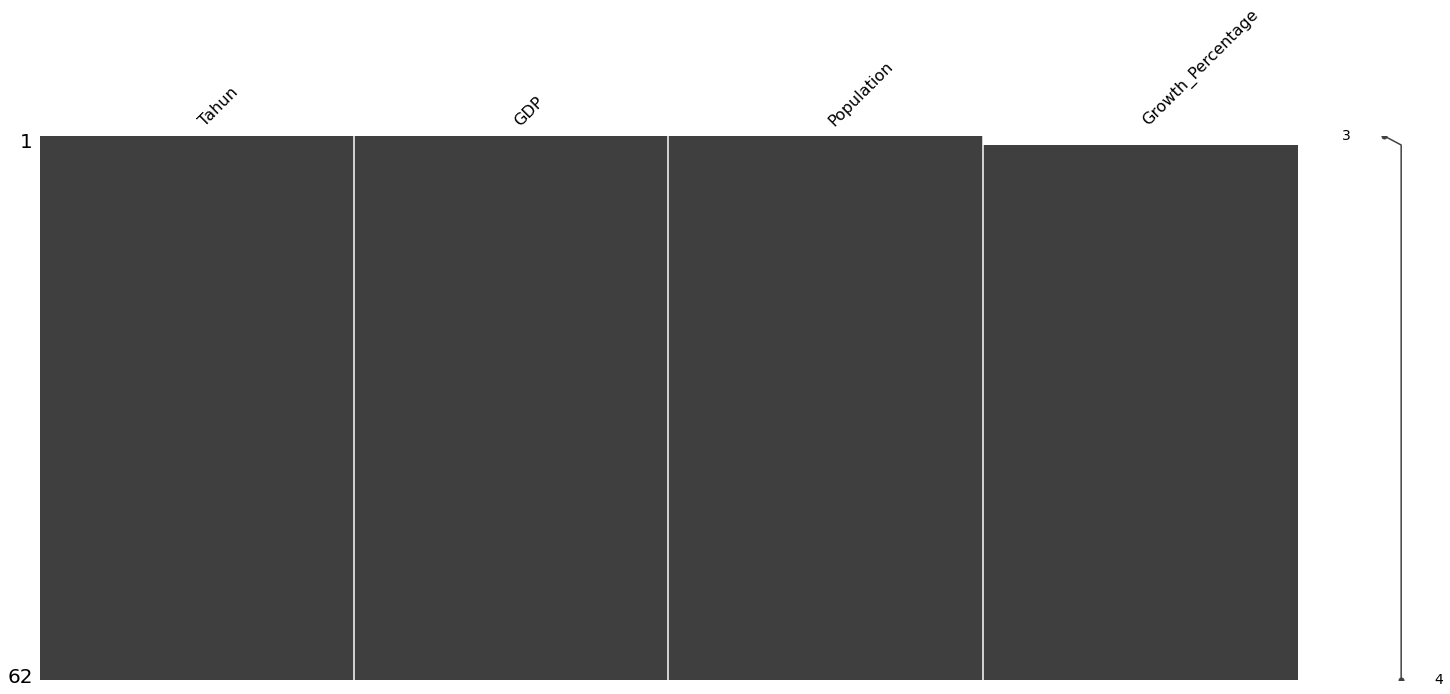

In [29]:
#Membuat visualisasi terhadap Missing Value yang berada di Dataframe Data_Master

missingno.matrix(Data_Master)

## Melakukan Univariate Analysis

### Fungsi untuk melakukan Univariate Analysis

In [30]:
# Fungsi yang digunakan untuk Numerical Univariate Analysis
def num_uni_box_analysis(Data_Master, var, friendly_name):
  ax = sns.boxplot(data=Data_Master, x=var)
  ax.set_xticks(list(Data_Master[var].quantile([0,0.25,0.5,0.75,0.95,1])))
  ax.set_xlabel(friendly_name)
  ax.set_title(f'{friendly_name} Distribution Univariate Analysis', fontsize=20)
  ax.figure.set_size_inches(24,8)

def num_uni_hist_analysis(Data_Master, var, friendly_name):
  ax = sns.histplot(data=Data_Master ,x=var, stat='percent')
  ax.set_xlabel(friendly_name)
  ax.set_title(f'{friendly_name} Distribution Histogram', fontsize=20)
  ax.figure.set_size_inches(24,8)

### Visualisasi Univariate Analysis

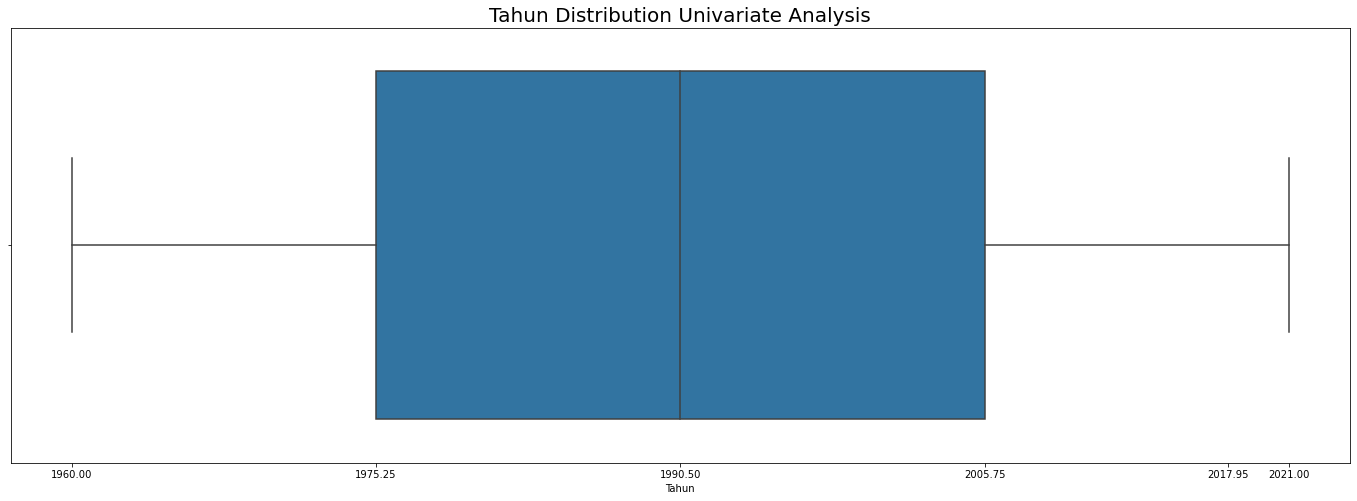

In [31]:
#Visualisasi Distribution Univariate Analysis (Box) pada Tahun

num_uni_box_analysis(Data_Master, 'Tahun', 'Tahun')
plt.show()

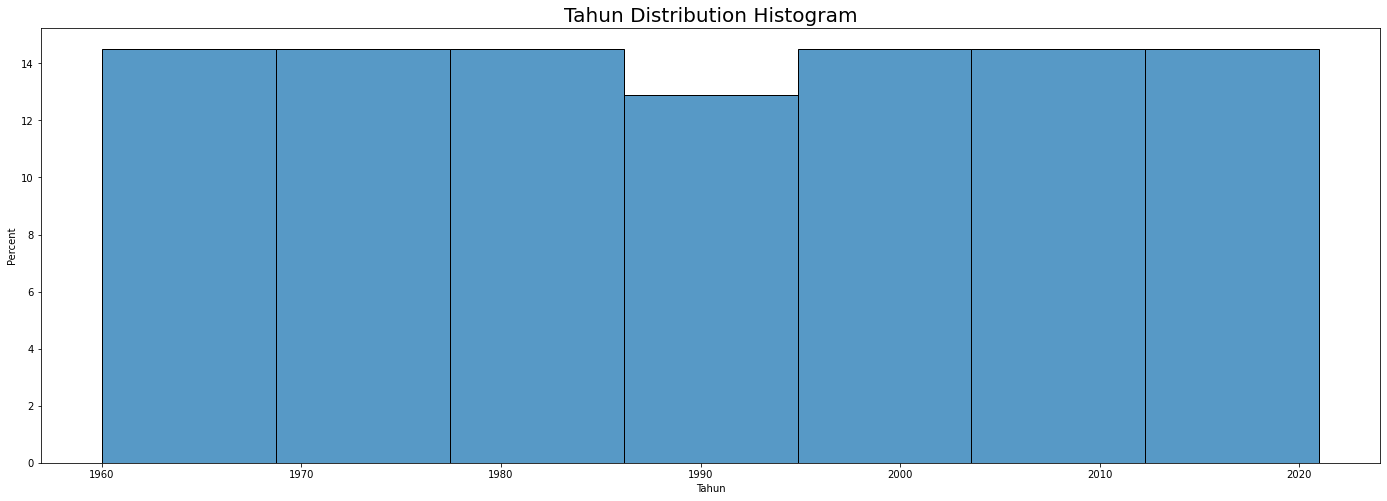

In [32]:
#Visualisasi Distribution Univariate Analysis (Histogram) pada Tahun

num_uni_hist_analysis(Data_Master, 'Tahun', 'Tahun')
plt.show()

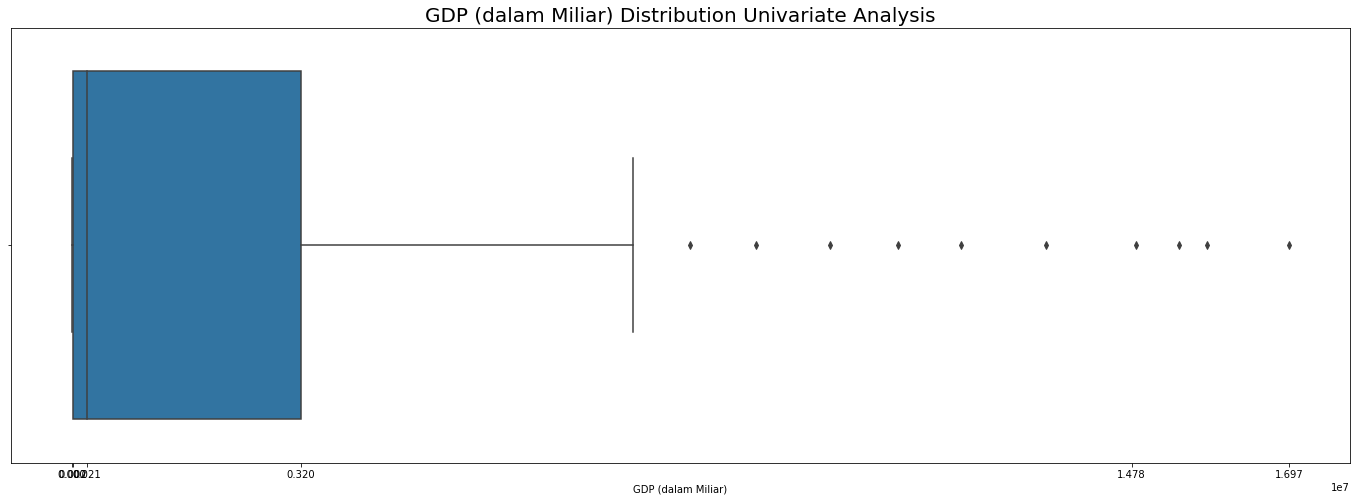

In [33]:
#Visualisasi Distribution Univariate Analysis (Box) pada GDP

num_uni_box_analysis(Data_Master, 'GDP', 'GDP (dalam Miliar)')
plt.show()

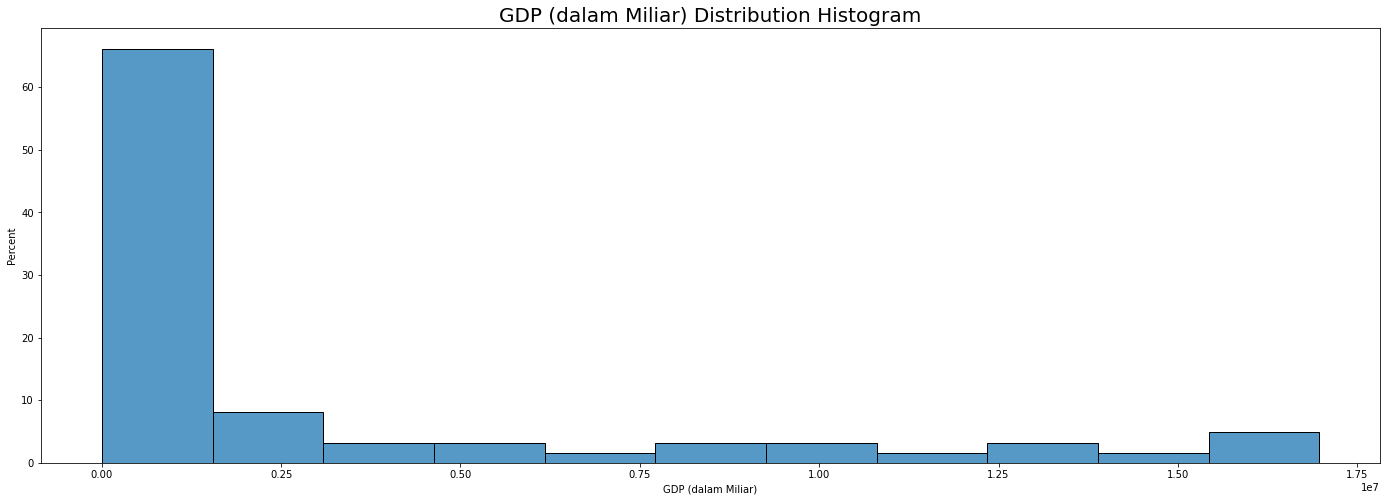

In [34]:
#Visualisasi Distribution Univariate Analysis (Histogram) pada GDP

num_uni_hist_analysis(Data_Master, 'GDP', 'GDP (dalam Miliar)')
plt.show()

<AxesSubplot:>

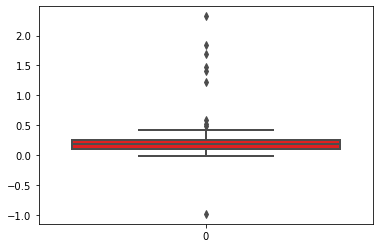

In [35]:
#Visualisasi Distribution Univariate Analysis (Boxplot) pada GDP

sns.boxplot(data=Data_Master['Growth_Percentage'], linewidth=2, color="red")

<AxesSubplot:>

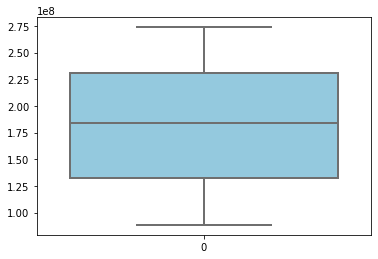

In [36]:
#Visualisasi Distribution Univariate Analysis (Boxplot) pada Population

sns.boxplot(data=Data_Master['Population'], linewidth=2, color="skyblue")

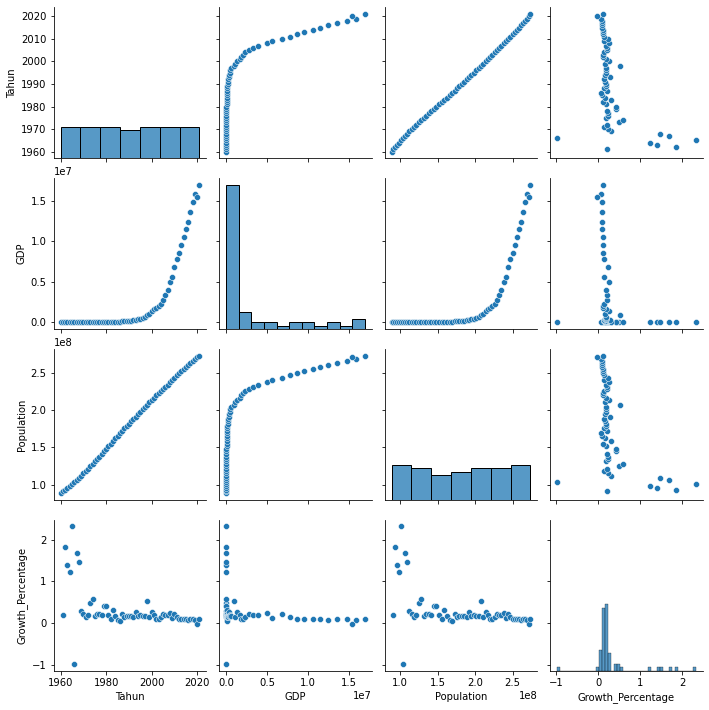

In [37]:
#Visualisasi Distribution Univariate Analysis (Boxplot) pada Dataframe Data_Master

sns.pairplot(Data_Master)
plt.show()

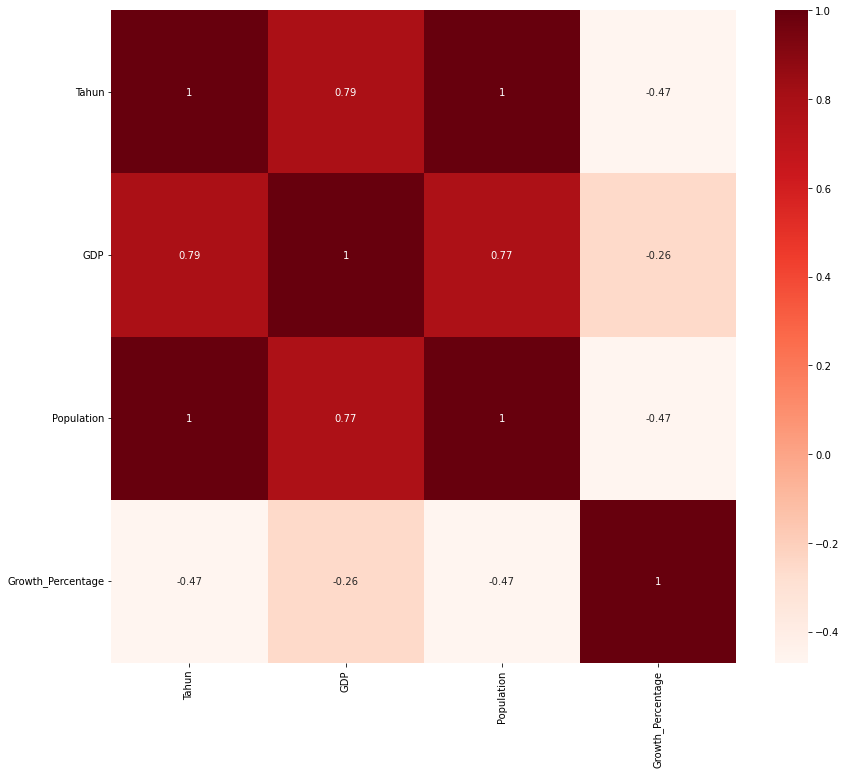

In [38]:
#Visualisasi korelasi pada setiap variable yang terdapat di Dataframe Data_Master

ax = sns.heatmap(Data_Master.corr(), annot=True, cmap='Reds')
ax.figure.set_size_inches(14,12)
plt.show()

## MODELLING PART 1

### Duplikasi Dataframe untuk dilakukan permodelan

In [62]:
GDP_model2 = Data_Master[['Tahun', 'Growth_Percentage']].copy()
GDP_model2.Tahun = pd.to_datetime(GDP_model2.Tahun, format='%Y')
GDP_model2.head(10)

,Tahun,Growth_Percentage
0,1960-01-01,NaN
1,1961-01-01,0.204767
2,1962-01-01,1.840034
3,1963-01-01,1.403415
4,1964-01-01,1.223105
5,1965-01-01,2.323754
6,1966-01-01,-0.986677
7,1967-01-01,1.683761
8,1968-01-01,1.473107
9,1969-01-01,0.296466


### Eksport Duplikasi Dataframe

In [40]:
#Eksport duplikasi dataframe ke dalam .csv

GDP_model2['Growth_Percentage'].to_csv('Growth only.csv', index= False)

### Visualisasi Dataframe

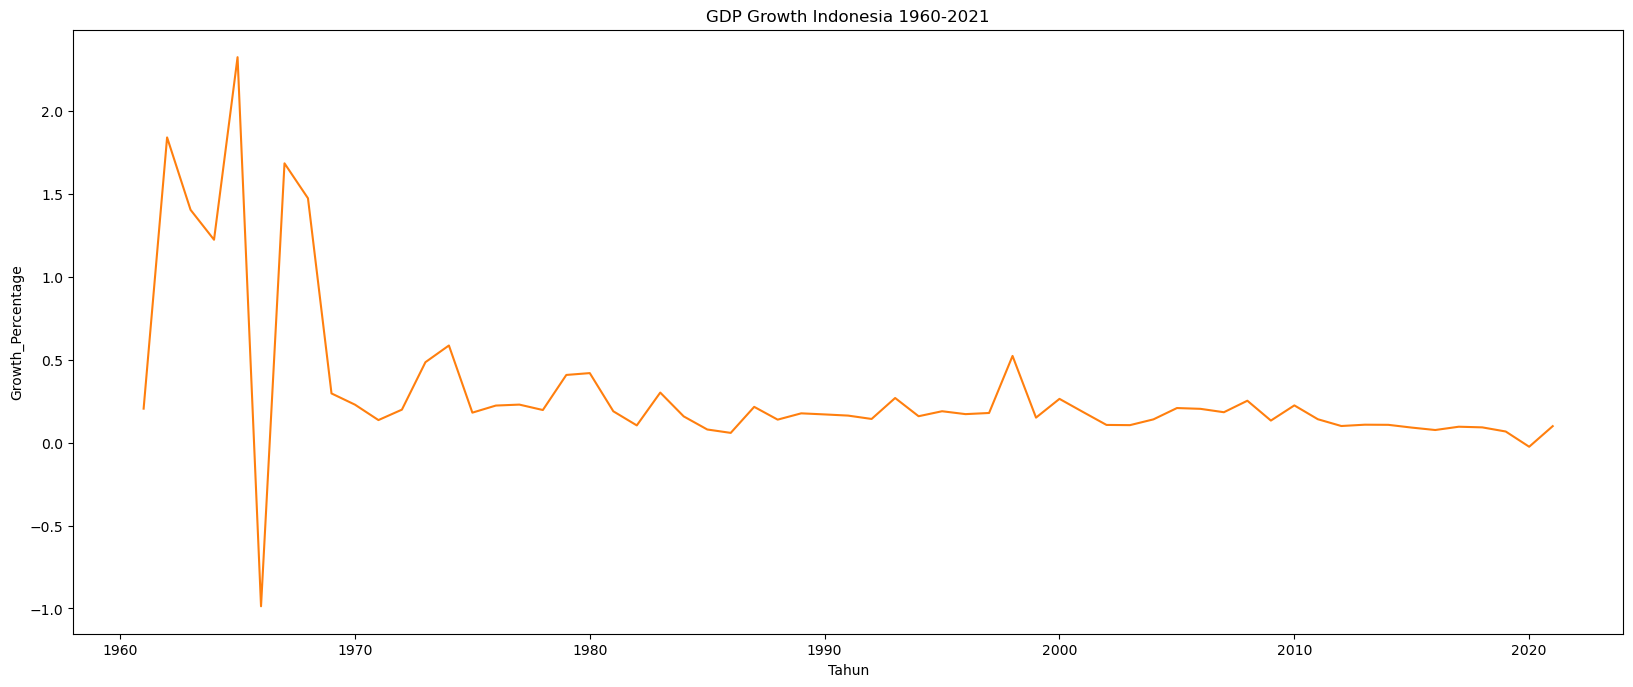

In [41]:
#Membuat visualisasi pergerakan GDP dari tahun 1960-2021

def plot_df(GDP_model2, x, y, title="", xlabel='Tahun', ylabel='Growth_Percentage', dpi=100):
    plt.figure(figsize=(20,8), dpi=dpi)
    plt.plot(x, y, color='tab:orange')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(GDP_model2, x=GDP_model2['Tahun'], y=GDP_model2['Growth_Percentage'], title='GDP Growth Indonesia 1960-2021')

In [42]:
#Defining Multiplicative or Additive Time Series - cari tahu definisinya lebih lanjut
#Kalo ada nilai negatif, maka bentuknya pasti berupa additive time series, bukan multiplicative

#from statsmodels.tsa.seasonal import seasonal_decompose
#from dateutil.parser import parse
#GDP_only = pd.read_csv('GDP only.csv')
#
## Multiplicative Decomposition 
#multiplicative_decomposition = seasonal_decompose(GDP_only, model='multiplicative', period=1)
#
## Additive Decomposition
#additive_decomposition = seasonal_decompose(GDP_only, model='additive', period=1)
#
## Plot
#plt.rcParams.update({'figure.figsize': (16,12)})
#
#multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#
#additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#
#plt.show()

### Test Stationery Data

In [43]:
# Melakukan test stasioner terhadap data GDP menggunakan Augmented Dickey-Fuller

Growth_only = pd.read_csv('Growth only.csv')

#Menghilangkan nilai NaN
Growth_only = Growth_only[1:]


In [63]:
passing_data=adfuller(Growth_only)

In [44]:
#Define the test
#Sumber: https://www.section.io/engineering-education/univariate-time-series-analysis-with-arima-in-python/
def adf_test(Growth):
    result=adfuller(Growth)
    labels = ['Test parameters', 'p-value','#Lags Used','Dataset observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Dataset is stationary")
    else:
        print("Dataset is non-stationary ")

In [45]:
#Run the test
adf_test(Growth_only)

Test parameters : -3.1436165372281915
p-value : 0.023489279118445044
#Lags Used : 5
Dataset observations : 55
Dataset is stationary


### Analisis Data GDP dalam menentukan order ARIMA yang harus dipakai

#### Penentuan Model dengan Manual interpreter

##### Menentukan order Indifference (I)

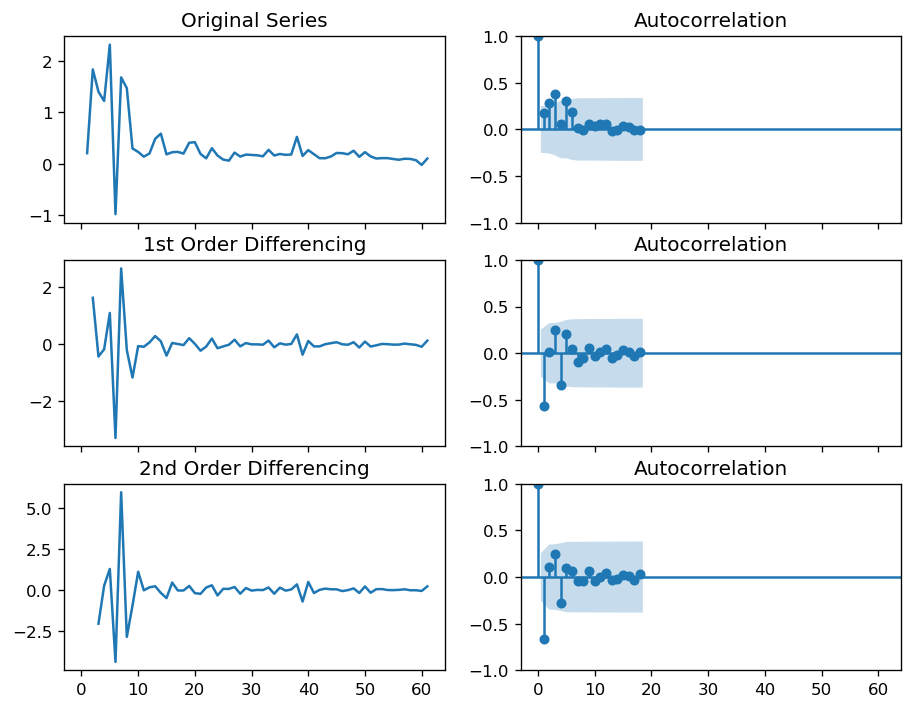

In [46]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('Growth only.csv', names=['value'], header=0)
df = df[1:]

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

#### Menentukan order Auto Regression (AR)

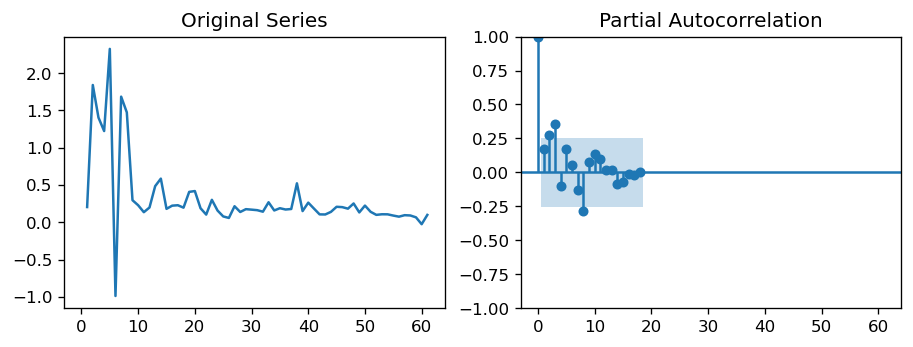

In [47]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value); axes[0].set_title('Original Series')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.dropna(), ax=axes[1])

plt.show()

#### Menentukan Moving Average (MA)

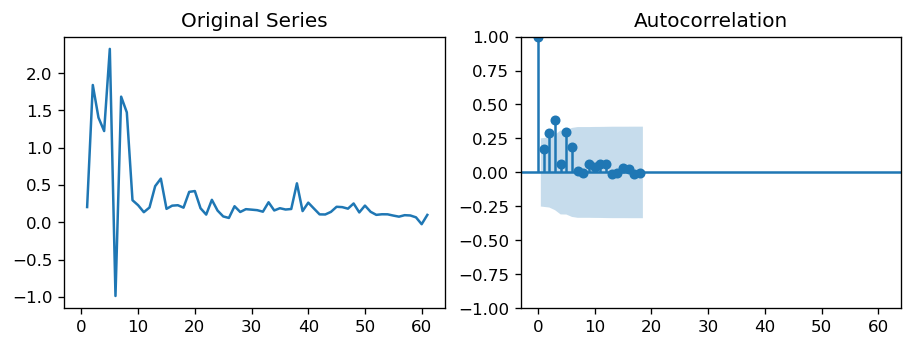

In [48]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value); axes[0].set_title('Original Series')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.dropna(), ax=axes[1])

plt.show()

### Melakukan Permodelan ARIMA dan Visualisasi hasil

In [49]:
#Permodelan ARIMA dengan order (1,0,1)

model = ARIMA(df.value, order=(1,0,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   61
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -38.028
Date:                Wed, 25 Jan 2023   AIC                             84.055
Time:                        00:44:28   BIC                             92.499
Sample:                             0   HQIC                            87.364
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4026      0.342      1.177      0.239      -0.268       1.073
ar.L1          0.9626      0.057     16.774      0.000       0.850       1.075
ma.L1         -0.7943      0.137     -5.791      0.0

In [50]:
#Permodelan ARIMA dengan order (1,1,1)

model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   61
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -35.087
Date:                Wed, 25 Jan 2023   AIC                             76.175
Time:                        00:44:28   BIC                             82.458
Sample:                             0   HQIC                            78.633
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3762      0.127     -2.967      0.003      -0.625      -0.128
ma.L1         -0.6888      0.106     -6.505      0.000      -0.896      -0.481
sigma2         0.1847      0.019      9.492      0.0

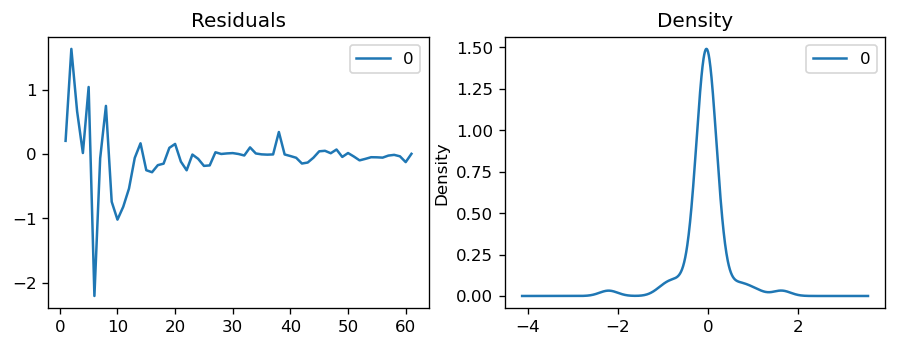

In [51]:
#Melakukan pengecekan hasil residual dan densitas data

residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [52]:
# Build Model
# model = ARIMA(train, order=(2,0,1))  
# sumber https://stackoverflow.com/questions/70223523/statsmodel-typeerror-fit-got-an-unexpected-keyword-argument-disp
#import statsmodels.api as smapi

#Create Training and Test
#train=df.value[:51]
#test=df.value[51:]
#
#model = sm.tsa.arima.ARIMA(train, order=(2,0,1))
#fitted = model.fit()
#
## Forecast
#fc, se, conf = fitted.forecast(3, alpha=0.05)  # 95% conf

##### Menentukan model ARIMA dengan Out of Time Cross-Validation

In [53]:
# Make as pandas series
#fc_series = pd.Series(fc, index=test.index)
#lower_series = pd.Series(conf[:, 0], index=test.index)
#upper_series = pd.Series(conf[:, 1], index=test.index)
#
## Plot
#plt.figure(figsize=(12,5), dpi=100)
#plt.plot(train, label='training')
#plt.plot(test, label='actual')
#plt.plot(fc_series, label='forecast')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
#                 color='k', alpha=.15)
#plt.title('Forecast vs Actuals')
#plt.legend(loc='upper left', fontsize=8)
#plt.show()

##### Menentukan model ARIMA dengan Auto ARIMA Forecast

In [54]:
model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # otomatis menggunakan ADF Test untuk menentukan nilai 'd' yang optimal
                      max_p=3, max_q=3, # nilai p dan q (default = 3)
                      m=1,              # jumlah series dalam satu tahun
                      d=None,           # model menentukan nilai 'd'
                      seasonal=False,   # Tanpa Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=83.510, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=109.756, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=100.514, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=104.856, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=80.091, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=91.680, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=78.287, Time=0.13 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=78.558, Time=0.09 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=75.827, Time=0.28 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=73.857, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=72.794, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=98.729, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=73.616, Time=0.19 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=94.339, Time=0.09 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.39 s

In [55]:
df

,value
1,0.204767
2,1.840034
3,1.403415
4,1.223105
5,2.323754
...,...
57,0.095801
58,0.091902
59,0.066980
60,-0.024926


Hasil menunjukkan 'SARIMAX Result' sebagai penamaan saja, selama Seasonality di-define False, tidak menggunakan seasonality

Sumber: https://stackoverflow.com/questions/69528507/auto-arima-seasonal-false-but-got-sarimax

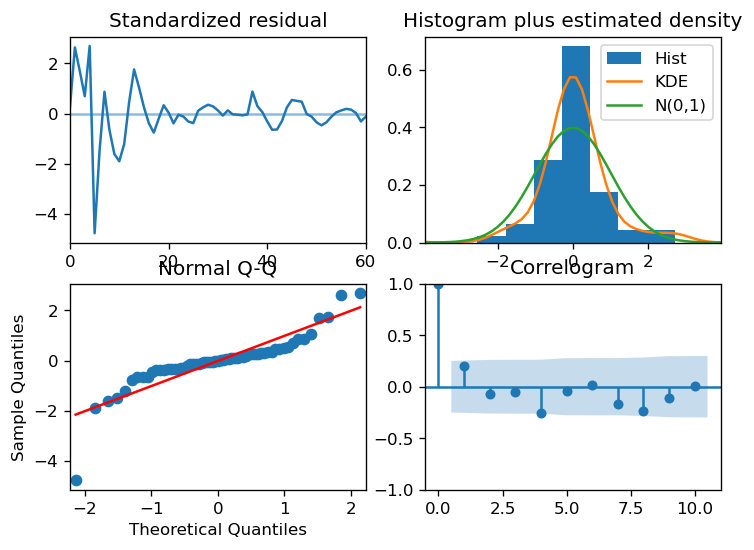

In [56]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

#### Visualisasi Hasil Forecast

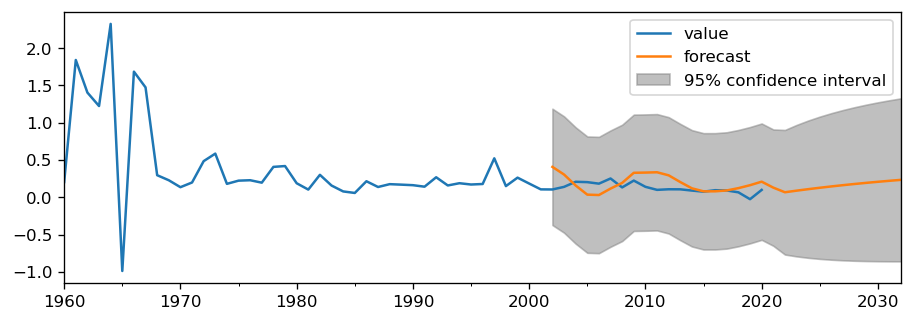

In [57]:
#sumber https://stackoverflow.com/questions/73112516/arimaresults-object-has-no-attribute-plot-predict-error

dta = df['value']
dta.index = pd.date_range(start='1960', end='2021', freq='A') #karena error sesuai dt di bawah data yang muncul 1970-2032 (jumlah data tetap 62 seperti jumlah awal)
res = ARIMA(dta, order=(1,0,2)).fit()
fig, ax = plt.subplots()
ax = dta.loc['1960':].plot(ax=ax)
plot_predict(res, '2002', '2032', ax=ax) #karena error maka seharusnya forecast dari (2012-2027)
plt.show()

In [58]:
# fit model
model = ARIMA(df, order=(1, 0, 2))
model_fit = model.fit()
# make prediction
hasil_prediksi = model_fit.predict(62, typ='levels')
print(hasil_prediksi)

63    0.068051
dtype: float64


In [59]:
print('Hasil prediksi tahun 2022 sebesar',  model_fit.predict(62, typ='levels'))

Hasil prediksi tahun 2022 sebesar 63    0.068051
dtype: float64


Target aktual PDB Tahun 2022  sebesar 5,2%-5,5%

In [60]:
print('Hasil prediksi tahun 2023 sebesar',  model_fit.predict(63, typ='levels'))


Hasil prediksi tahun 2023 sebesar 64    0.089292
dtype: float64


Target aktual PDB tahun 2023 sebesar 4,5%-5,3%

In [61]:
df

,value
1,0.204767
2,1.840034
3,1.403415
4,1.223105
5,2.323754
...,...
57,0.095801
58,0.091902
59,0.066980
60,-0.024926
